## Data Introduction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [ ]:
#team mashed potatoes, I'm pasting here the for parsing the accre/jobs data, although you maybe already have done this
jobs = pd.read_csv("../data/fullsample.csv")
jobs_completed = jobs[jobs['STATE'] == 'COMPLETED']
jobs_completed['END'] = pd.to_datetime(jobs_completed['END'])
#eg:
jobs_20201204 = jobs_completed[(jobs_completed['END'] > '2020-12-04 00:00:00') & ((jobs_completed['END'] < '2020-12-05 00:00:00'))]
jobs_20201204

In [4]:
jobs = pd.read_csv("../data/fullsample.csv")

In [6]:
jobs.shape

(7395885, 12)

In [ ]:
jobs.count()

In [ ]:
jobs.columns

In [ ]:
jobs_clean = jobs[jobs['STATE'] != 'RUNNING']

In [ ]:
jobs[jobs['STATE'] == 'RUNNING'].count()

In [ ]:
jobs_clean.count()

In [ ]:
jobs_clean['STATE'].value_counts()
#jobs['STATE'].value_counts()

In [ ]:
jobs_cancelled = jobs[jobs['STATE'] == 'CANCELLED']
jobs_cancelled.shape

The **BEGIN** field indicates when the job was started (initiated on a computer node).

The **END** field indicates when the job ended (completed, failed, or was cancelled while running).

The **REQMEM** field is the amount of memory requested in megabytes. It can be per-core/CPU (Mc) or per-node (Mn).



In [ ]:
# Jobs where memory was requested per core.
jobs[jobs['REQMEM'].str[-2:] == 'Mc'].head()

In [ ]:
# Jobs where memory was requested per node.
jobs[jobs['REQMEM'].str[-2:] == 'Mn'].head()

The USEDMEM column is the amount of memory used in MB per node.

The requested time (REQTIME) and used time (USEDTIME) columns are in d-hh:mm:ss or hh:mm:ss for jobs less than one day in duration.

**NODES** is the number of servers used for the job. Most jobs are single node. For multiple node jobs, memory usage is the maximum over all nodes.

**CPUS** is the total number of CPU cores allocated to the job, and for multi-node jobs, this includes all nodes.

Most jobs are run in the "production" or "nogpfs" partition. The "debug" and "sam" partitions are test jobs that are expected to be short, and the "maxwell", "pascal", and "turing" partitions are for GPU resources.

In [ ]:
jobs['PARTITION'].value_counts()

The **EXITCODE** gives the [exit code](https://www.agileconnection.com/article/overview-linux-exit-codes) for the job, with "0:0" indicating a successful job. Exit codes have two numbers, where if the first number is non-zero, it indicates a problem on the server side and if the second is nonzero, it indicates a problem on the user side.

In [ ]:
jobs['EXITCODE'].value_counts()

In [ ]:
jobs[jobs['EXITCODE'] == '1:0']

In [ ]:
jobs[jobs['EXITCODE'] == '0:15']

In [8]:
jobs_completed = jobs[jobs['STATE'] == 'COMPLETED']

In [10]:
jobs_completed.shape

(7375084, 12)

In [ ]:
jobs_completed.info()

In [ ]:
jobs_completed['END'].dtype

In [ ]:
#df['Mycol'] = pd.to_datetime(df['Mycol'], format='%d%b%Y:%H:%M:%S.%f')

In [ ]:
jobs_completed['END']

In [12]:
jobs_completed['END'] = pd.to_datetime(jobs_completed['END'])
jobs_completed

C:\Users\Maria\AppData\Local\Temp\ipykernel_32044\4105075721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobs_completed['END'] = pd.to_datetime(jobs_completed['END'])


,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE
1,30853133,COMPLETED,2021-08-06T11:36:09,2021-09-05 11:36:32,262144Mn,20604.62M,30-00:00:00,30-00:00:23,1,1,cgw-platypus,0:0
2,30858137,COMPLETED,2021-08-06T19:04:39,2021-09-05 19:04:53,204800Mn,57553.77M,30-00:00:00,30-00:00:14,1,32,cgw-tbi01,0:0
3,30935078,COMPLETED,2021-08-09T16:52:51,2021-09-07 20:52:55,65536Mn,20577.96M,29-04:00:00,29-04:00:04,1,8,cgw-platypus,0:0
4,31364111_2,COMPLETED,2021-08-17T07:45:07,2021-09-10 16:45:24,16384Mn,9733.43M,24-09:00:00,24-09:00:17,1,1,production,0:0
5,31364111_3,COMPLETED,2021-08-17T07:45:07,2021-09-06 16:17:34,16384Mn,9708.04M,24-09:00:00,20-08:32:27,1,1,production,0:0
...,...,...,...,...,...,...,...,...,...,...,...,...
7395880,25493434,COMPLETED,2020-10-31T23:39:00,2020-10-31 23:40:46,2000Mn,0.09M,2-00:00:00,00:01:46,1,1,sam,0:0
7395881,25493435,COMPLETED,2020-10-31T23:39:13,2020-10-31 23:40:38,2000Mn,187.92M,2-00:00:00,00:01:25,1,1,sam,0:0
7395882,25493476,COMPLETED,2020-10-31T23:46:29,2020-10-31 23:49:43,4096Mc,803.97M,12:00:00,00:03:14,1,1,production,0:0
7395883,25493515,COMPLETED,2020-10-31T23:49:44,2020-10-31 23:51:40,2000Mn,0.09M,2-00:00:00,00:01:56,1,1,sam,0:0


In [ ]:
testdf = jobs_completed.sample(5).reset_index()
testdf

In [ ]:
testdf['REQTIME'] = testdf['REQTIME'].str.replace('-', 'd')
testdf['USEDTIME'] = testdf['USEDTIME'].str.replace('-', 'd')
testdf

In [ ]:
testdf['REQTIME'] = pd.to_timedelta(testdf['REQTIME'])
testdf['USEDTIME'] = pd.to_timedelta(testdf['USEDTIME'])
testdf

In [ ]:
testdf['TIMEDIFF'] = testdf['REQTIME'] - testdf['USEDTIME']

In [ ]:
testdf

In [14]:
jobs_completed['REQTIME'] = jobs_completed['REQTIME'].str.replace('-', 'd')
jobs_completed['USEDTIME'] = jobs_completed['USEDTIME'].str.replace('-', 'd')
jobs_completed

C:\Users\Maria\AppData\Local\Temp\ipykernel_32044\3115560303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobs_completed['REQTIME'] = jobs_completed['REQTIME'].str.replace('-', 'd')
C:\Users\Maria\AppData\Local\Temp\ipykernel_32044\3115560303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobs_completed['USEDTIME'] = jobs_completed['USEDTIME'].str.replace('-', 'd')


,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE
1,30853133,COMPLETED,2021-08-06T11:36:09,2021-09-05 11:36:32,262144Mn,20604.62M,30d00:00:00,30d00:00:23,1,1,cgw-platypus,0:0
2,30858137,COMPLETED,2021-08-06T19:04:39,2021-09-05 19:04:53,204800Mn,57553.77M,30d00:00:00,30d00:00:14,1,32,cgw-tbi01,0:0
3,30935078,COMPLETED,2021-08-09T16:52:51,2021-09-07 20:52:55,65536Mn,20577.96M,29d04:00:00,29d04:00:04,1,8,cgw-platypus,0:0
4,31364111_2,COMPLETED,2021-08-17T07:45:07,2021-09-10 16:45:24,16384Mn,9733.43M,24d09:00:00,24d09:00:17,1,1,production,0:0
5,31364111_3,COMPLETED,2021-08-17T07:45:07,2021-09-06 16:17:34,16384Mn,9708.04M,24d09:00:00,20d08:32:27,1,1,production,0:0
...,...,...,...,...,...,...,...,...,...,...,...,...
7395880,25493434,COMPLETED,2020-10-31T23:39:00,2020-10-31 23:40:46,2000Mn,0.09M,2d00:00:00,00:01:46,1,1,sam,0:0
7395881,25493435,COMPLETED,2020-10-31T23:39:13,2020-10-31 23:40:38,2000Mn,187.92M,2d00:00:00,00:01:25,1,1,sam,0:0
7395882,25493476,COMPLETED,2020-10-31T23:46:29,2020-10-31 23:49:43,4096Mc,803.97M,12:00:00,00:03:14,1,1,production,0:0
7395883,25493515,COMPLETED,2020-10-31T23:49:44,2020-10-31 23:51:40,2000Mn,0.09M,2d00:00:00,00:01:56,1,1,sam,0:0


In [16]:
jobs_completed['REQTIME'] = pd.to_timedelta(jobs_completed['REQTIME'])
jobs_completed['USEDTIME'] = pd.to_timedelta(jobs_completed['USEDTIME'])
jobs_completed

C:\Users\Maria\AppData\Local\Temp\ipykernel_32044\386488756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobs_completed['REQTIME'] = pd.to_timedelta(jobs_completed['REQTIME'])
C:\Users\Maria\AppData\Local\Temp\ipykernel_32044\386488756.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobs_completed['USEDTIME'] = pd.to_timedelta(jobs_completed['USEDTIME'])


,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE
1,30853133,COMPLETED,2021-08-06T11:36:09,2021-09-05 11:36:32,262144Mn,20604.62M,30 days 00:00:00,30 days 00:00:23,1,1,cgw-platypus,0:0
2,30858137,COMPLETED,2021-08-06T19:04:39,2021-09-05 19:04:53,204800Mn,57553.77M,30 days 00:00:00,30 days 00:00:14,1,32,cgw-tbi01,0:0
3,30935078,COMPLETED,2021-08-09T16:52:51,2021-09-07 20:52:55,65536Mn,20577.96M,29 days 04:00:00,29 days 04:00:04,1,8,cgw-platypus,0:0
4,31364111_2,COMPLETED,2021-08-17T07:45:07,2021-09-10 16:45:24,16384Mn,9733.43M,24 days 09:00:00,24 days 09:00:17,1,1,production,0:0
5,31364111_3,COMPLETED,2021-08-17T07:45:07,2021-09-06 16:17:34,16384Mn,9708.04M,24 days 09:00:00,20 days 08:32:27,1,1,production,0:0
...,...,...,...,...,...,...,...,...,...,...,...,...
7395880,25493434,COMPLETED,2020-10-31T23:39:00,2020-10-31 23:40:46,2000Mn,0.09M,2 days 00:00:00,0 days 00:01:46,1,1,sam,0:0
7395881,25493435,COMPLETED,2020-10-31T23:39:13,2020-10-31 23:40:38,2000Mn,187.92M,2 days 00:00:00,0 days 00:01:25,1,1,sam,0:0
7395882,25493476,COMPLETED,2020-10-31T23:46:29,2020-10-31 23:49:43,4096Mc,803.97M,0 days 12:00:00,0 days 00:03:14,1,1,production,0:0
7395883,25493515,COMPLETED,2020-10-31T23:49:44,2020-10-31 23:51:40,2000Mn,0.09M,2 days 00:00:00,0 days 00:01:56,1,1,sam,0:0


In [ ]:
jobs_completed['TIMEDIFF'] = jobs_completed['REQTIME'] - jobs_completed['USEDTIME']
jobs_completed

In [18]:
jobs_completed['TIMEDIFF'] = (jobs_completed['REQTIME'] - jobs_completed['USEDTIME']).dt.total_seconds()
jobs_completed

C:\Users\Maria\AppData\Local\Temp\ipykernel_32044\1468523761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobs_completed['TIMEDIFF'] = (jobs_completed['REQTIME'] - jobs_completed['USEDTIME']).dt.total_seconds()


,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,TIMEDIFF
1,30853133,COMPLETED,2021-08-06T11:36:09,2021-09-05 11:36:32,262144Mn,20604.62M,30 days 00:00:00,30 days 00:00:23,1,1,cgw-platypus,0:0,-23.0
2,30858137,COMPLETED,2021-08-06T19:04:39,2021-09-05 19:04:53,204800Mn,57553.77M,30 days 00:00:00,30 days 00:00:14,1,32,cgw-tbi01,0:0,-14.0
3,30935078,COMPLETED,2021-08-09T16:52:51,2021-09-07 20:52:55,65536Mn,20577.96M,29 days 04:00:00,29 days 04:00:04,1,8,cgw-platypus,0:0,-4.0
4,31364111_2,COMPLETED,2021-08-17T07:45:07,2021-09-10 16:45:24,16384Mn,9733.43M,24 days 09:00:00,24 days 09:00:17,1,1,production,0:0,-17.0
5,31364111_3,COMPLETED,2021-08-17T07:45:07,2021-09-06 16:17:34,16384Mn,9708.04M,24 days 09:00:00,20 days 08:32:27,1,1,production,0:0,347253.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7395880,25493434,COMPLETED,2020-10-31T23:39:00,2020-10-31 23:40:46,2000Mn,0.09M,2 days 00:00:00,0 days 00:01:46,1,1,sam,0:0,172694.0
7395881,25493435,COMPLETED,2020-10-31T23:39:13,2020-10-31 23:40:38,2000Mn,187.92M,2 days 00:00:00,0 days 00:01:25,1,1,sam,0:0,172715.0
7395882,25493476,COMPLETED,2020-10-31T23:46:29,2020-10-31 23:49:43,4096Mc,803.97M,0 days 12:00:00,0 days 00:03:14,1,1,production,0:0,43006.0
7395883,25493515,COMPLETED,2020-10-31T23:49:44,2020-10-31 23:51:40,2000Mn,0.09M,2 days 00:00:00,0 days 00:01:56,1,1,sam,0:0,172684.0


In [20]:
jobs_completed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7375084 entries, 1 to 7395884
Data columns (total 13 columns):
 #   Column     Dtype          
---  ------     -----          
 0   JOBID      object         
 1   STATE      object         
 2   BEGIN      object         
 3   END        datetime64[ns] 
 4   REQMEM     object         
 5   USEDMEM    object         
 6   REQTIME    timedelta64[ns]
 7   USEDTIME   timedelta64[ns]
 8   NODES      int64          
 9   CPUS       int64          
 10  PARTITION  object         
 11  EXITCODE   object         
 12  TIMEDIFF   float64        
dtypes: datetime64[ns](1), float64(1), int64(2), object(7), timedelta64[ns](2)
memory usage: 787.7+ MB


In [22]:
jobs_completed = jobs_completed.loc[jobs_completed['TIMEDIFF'] != 0]
jobs_completed

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,TIMEDIFF
1,30853133,COMPLETED,2021-08-06T11:36:09,2021-09-05 11:36:32,262144Mn,20604.62M,30 days 00:00:00,30 days 00:00:23,1,1,cgw-platypus,0:0,-23.0
2,30858137,COMPLETED,2021-08-06T19:04:39,2021-09-05 19:04:53,204800Mn,57553.77M,30 days 00:00:00,30 days 00:00:14,1,32,cgw-tbi01,0:0,-14.0
3,30935078,COMPLETED,2021-08-09T16:52:51,2021-09-07 20:52:55,65536Mn,20577.96M,29 days 04:00:00,29 days 04:00:04,1,8,cgw-platypus,0:0,-4.0
4,31364111_2,COMPLETED,2021-08-17T07:45:07,2021-09-10 16:45:24,16384Mn,9733.43M,24 days 09:00:00,24 days 09:00:17,1,1,production,0:0,-17.0
5,31364111_3,COMPLETED,2021-08-17T07:45:07,2021-09-06 16:17:34,16384Mn,9708.04M,24 days 09:00:00,20 days 08:32:27,1,1,production,0:0,347253.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7395880,25493434,COMPLETED,2020-10-31T23:39:00,2020-10-31 23:40:46,2000Mn,0.09M,2 days 00:00:00,0 days 00:01:46,1,1,sam,0:0,172694.0
7395881,25493435,COMPLETED,2020-10-31T23:39:13,2020-10-31 23:40:38,2000Mn,187.92M,2 days 00:00:00,0 days 00:01:25,1,1,sam,0:0,172715.0
7395882,25493476,COMPLETED,2020-10-31T23:46:29,2020-10-31 23:49:43,4096Mc,803.97M,0 days 12:00:00,0 days 00:03:14,1,1,production,0:0,43006.0
7395883,25493515,COMPLETED,2020-10-31T23:49:44,2020-10-31 23:51:40,2000Mn,0.09M,2 days 00:00:00,0 days 00:01:56,1,1,sam,0:0,172684.0


In [ ]:
#df['start_time2'] = df['start_time'].apply(lambda x: x.replace(minute=0, second=0))

In [66]:
jobs_completed[(jobs_completed['END'] > '2020-12-04 13:00:00') & ((jobs_completed['END'] < '2020-12-04 16:00:00'))].count()

JOBID        1177
STATE        1177
BEGIN        1177
END          1177
REQMEM       1177
USEDMEM      1177
REQTIME      1177
USEDTIME     1177
NODES        1177
CPUS         1177
PARTITION    1177
EXITCODE     1177
TIMEDIFF     1177
dtype: int64

In [68]:
jobs_completed[(jobs_completed['END'] > '2020-12-04 11:00:00') & ((jobs_completed['END'] < '2020-12-04 13:00:00'))].count()

JOBID        511
STATE        511
BEGIN        511
END          511
REQMEM       511
USEDMEM      511
REQTIME      511
USEDTIME     511
NODES        511
CPUS         511
PARTITION    511
EXITCODE     511
TIMEDIFF     511
dtype: int64

In [70]:
jobs_completed[(jobs_completed['END'] > '2020-12-04 15:00:00') & ((jobs_completed['END'] < '2020-12-04 17:00:00'))].count()

JOBID        1035
STATE        1035
BEGIN        1035
END          1035
REQMEM       1035
USEDMEM      1035
REQTIME      1035
USEDTIME     1035
NODES        1035
CPUS         1035
PARTITION    1035
EXITCODE     1035
TIMEDIFF     1035
dtype: int64

In [72]:
jobs_completed[(jobs_completed['END'] > '2020-12-04 17:00:00') & ((jobs_completed['END'] < '2020-12-04 19:00:00'))].count()

JOBID        2591
STATE        2591
BEGIN        2591
END          2591
REQMEM       2591
USEDMEM      2591
REQTIME      2591
USEDTIME     2591
NODES        2591
CPUS         2591
PARTITION    2591
EXITCODE     2591
TIMEDIFF     2591
dtype: int64

In [74]:
jobs_completed[(jobs_completed['END'] > '2020-12-04 19:00:00') & ((jobs_completed['END'] < '2020-12-04 21:00:00'))].count()

JOBID        2888
STATE        2888
BEGIN        2888
END          2888
REQMEM       2888
USEDMEM      2888
REQTIME      2888
USEDTIME     2888
NODES        2888
CPUS         2888
PARTITION    2888
EXITCODE     2888
TIMEDIFF     2888
dtype: int64

In [76]:
jobs_completed[(jobs_completed['END'] > '2021-04-21 20:00:00') & ((jobs_completed['END'] < '2021-04-22 22:00:00'))].count()

JOBID        31002
STATE        31002
BEGIN        31002
END          31002
REQMEM       31002
USEDMEM      31002
REQTIME      31002
USEDTIME     31002
NODES        31002
CPUS         31002
PARTITION    31002
EXITCODE     31002
TIMEDIFF     31002
dtype: int64

In [78]:
jobs_completed[(jobs_completed['END'] > '2021-04-21 18:00:00') & ((jobs_completed['END'] < '2021-04-22 20:00:00'))].count()

JOBID        31705
STATE        31705
BEGIN        31705
END          31705
REQMEM       31705
USEDMEM      31705
REQTIME      31705
USEDTIME     31705
NODES        31705
CPUS         31705
PARTITION    31705
EXITCODE     31705
TIMEDIFF     31705
dtype: int64

In [80]:
jobs_completed[(jobs_completed['END'] > '2021-04-21 22:00:00') & ((jobs_completed['END'] < '2021-04-23 00:00:00'))].count()

JOBID        31487
STATE        31487
BEGIN        31487
END          31487
REQMEM       31487
USEDMEM      31487
REQTIME      31487
USEDTIME     31487
NODES        31487
CPUS         31487
PARTITION    31487
EXITCODE     31487
TIMEDIFF     31487
dtype: int64

In [32]:
jobs_completed['END'].value_counts().head(20)

END
2021-07-12 11:36:02    312
2021-02-17 16:45:58    297
2021-02-17 16:45:57    284
2021-02-25 23:56:42    274
2021-06-16 22:34:57    247
2020-10-07 15:03:10    242
2021-02-10 13:04:28    240
2021-05-10 20:55:20    237
2021-09-02 11:15:15    232
2021-06-03 17:31:18    228
2021-06-04 09:37:19    214
2020-12-11 09:02:40    207
2021-01-27 17:11:50    199
2020-11-13 15:31:51    199
2020-10-02 12:21:41    198
2021-09-02 11:15:14    197
2021-05-10 20:55:21    195
2021-06-03 17:31:26    193
2020-10-02 09:40:55    188
2021-02-16 23:20:36    187
Name: count, dtype: int64

<Axes: xlabel='End Date'>

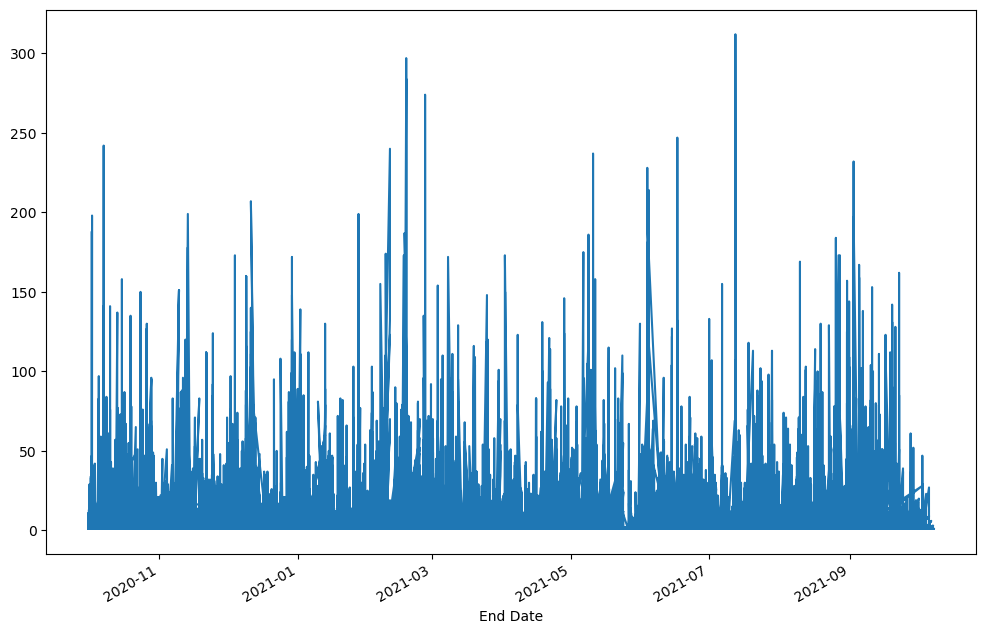

In [64]:
plt.figure(figsize = (12,8))
jobs_completed['END'].value_counts(sort=False).plot(kind='line', xlabel='End Date')
#xmin, xmax = plt.xlim()
#plt.hlines(y = 200, xmin=xmin, xmax=xmax, color = 'red', linestyle = 'dashed')

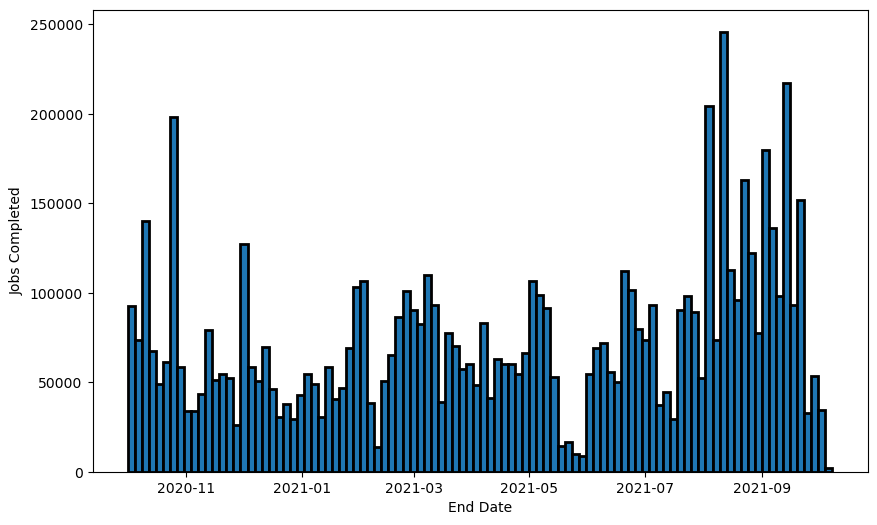

In [82]:
fig,ax = plt.subplots(figsize = (10,6))   

plt.hist(
    data=jobs_completed,
    x='END',
    edgecolor='Black',
    linewidth=2,
    bins = 100
    );
plt.xlabel('End Date')                            
plt.ylabel('Jobs Completed');
#plt.title('ACCRE Job Completion');

In [84]:
jobs_20201204 = jobs_completed[(jobs_completed['END'] > '2020-12-04 00:00:00') & ((jobs_completed['END'] < '2020-12-05 00:00:00'))]
jobs_20201204

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,TIMEDIFF
5791267,25724140,COMPLETED,2020-11-13T12:13:36,2020-12-04 08:13:42,92160Mn,22462.96M,20 days 20:00:00,20 days 20:00:06,1,8,cgw-dougherty1,0:0,-6.0
5791308,25921757_48,COMPLETED,2020-12-02T01:50:42,2020-12-04 09:50:54,49152Mn,46.33M,2 days 08:00:00,2 days 08:00:12,1,8,production,0:0,-12.0
5791309,25921757_49,COMPLETED,2020-12-02T02:34:57,2020-12-04 10:37:40,49152Mn,46.32M,2 days 08:00:00,2 days 08:02:43,1,8,production,0:0,-163.0
5791310,25921757_50,COMPLETED,2020-12-02T04:50:13,2020-12-04 12:52:10,49152Mn,46.34M,2 days 08:00:00,2 days 08:01:57,1,8,production,0:0,-117.0
5791312,25921757_52,COMPLETED,2020-12-02T19:05:18,2020-12-04 07:24:19,49152Mn,86.13M,2 days 08:00:00,1 days 12:19:01,1,8,production,0:0,70859.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5943111,26291649,COMPLETED,2020-12-04T23:31:58,2020-12-04 23:42:14,2000Mn,0.06M,2 days 00:00:00,0 days 00:10:16,1,1,sam,0:0,172184.0
5943113,26291651,COMPLETED,2020-12-04T23:38:18,2020-12-04 23:39:35,2000Mn,0.09M,2 days 00:00:00,0 days 00:01:17,1,1,sam,0:0,172723.0
5943114,26291652,COMPLETED,2020-12-04T23:41:03,2020-12-04 23:43:25,2000Mn,0.09M,2 days 00:00:00,0 days 00:02:22,1,1,sam,0:0,172658.0
5943115,26291653,COMPLETED,2020-12-04T23:43:23,2020-12-04 23:44:26,2000Mn,0.09M,2 days 00:00:00,0 days 00:01:03,1,1,sam,0:0,172737.0


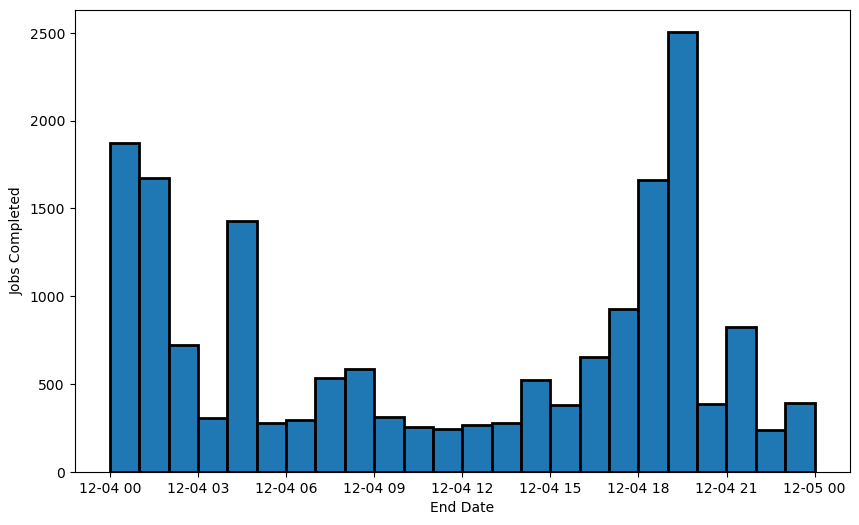

In [86]:
fig,ax = plt.subplots(figsize = (10,6))   

plt.hist(
    data=jobs_20201204,
    x='END',
    edgecolor='Black',
    linewidth=2,
    bins = 24
    );
plt.xlabel('End Date')                            
plt.ylabel('Jobs Completed');

In [88]:
jobs_20210421 = jobs_completed[(jobs_completed['END'] > '2021-04-21 00:00:00') & ((jobs_completed['END'] < '2021-04-22 00:00:00'))]

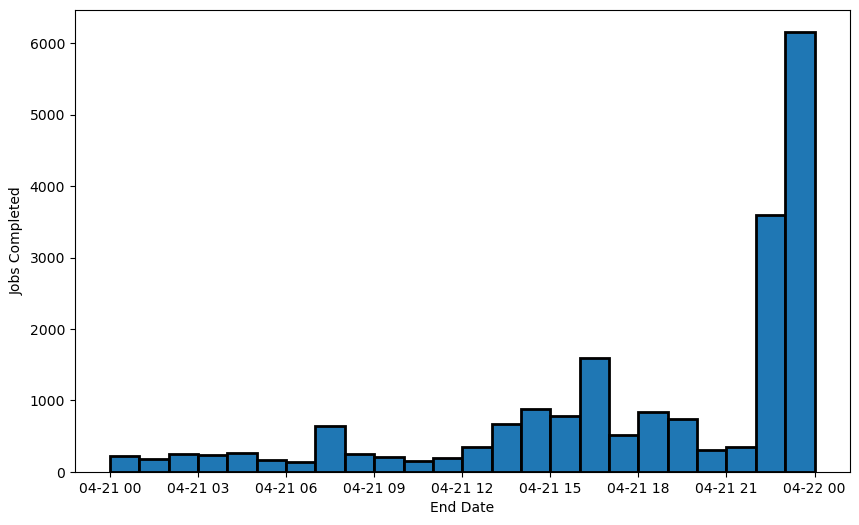

In [90]:
fig,ax = plt.subplots(figsize = (10,6))   

plt.hist(
    data=jobs_20210421,
    x='END',
    edgecolor='Black',
    linewidth=2,
    bins = 24
    );
plt.xlabel('End Date')                            
plt.ylabel('Jobs Completed');

In [106]:
jobs_20210301 = jobs_completed[(jobs_completed['END'] > '2021-03-01 00:00:00') & ((jobs_completed['END'] < '2021-03-02 00:00:00'))]

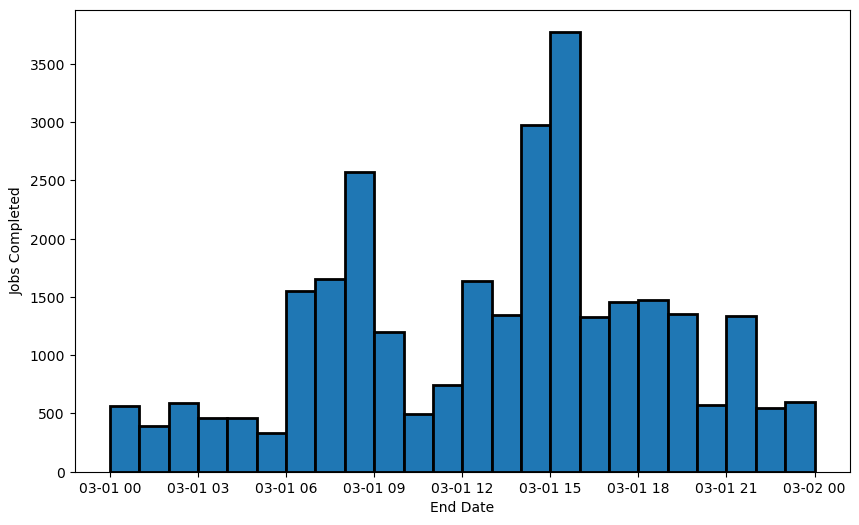

In [108]:
fig,ax = plt.subplots(figsize = (10,6))   

plt.hist(
    data=jobs_20210301,
    x='END',
    edgecolor='Black',
    linewidth=2,
    bins = 24
    );
plt.xlabel('End Date')                            
plt.ylabel('Jobs Completed');

In [ ]:
jobs_completed_quicker = jobs_completed.loc[jobs_completed['TIMEDIFF'] < 0]
jobs_completed_quicker

In [24]:
jobs_completed_quicker['END'].value_counts()

NameError: name 'jobs_completed_quicker' is not defined

In [ ]:
plt.figure(figsize = (16,8))
jobs_completed_quicker['END'].value_counts(sort=False).plot(kind='line', xlabel='End Date')

In [ ]:
pd.to_timedelta('34d23:15:05')

In [ ]:
def timeconvert(x):
    try: 
        x = pd.to_datetime(x, format=('%H:%M:%S'))
    except:
        x = pd.to_datetime(x, format=('%d-%H:%M:%S'))
    return x

In [ ]:
#df['new_column'] = [your_func(x) for x in df['column']]
testdf['REQTIME'] = [timeconvert(x) for x in testdf['REQTIME']]
testdf

In [ ]:
jobs_completed['REQTIME'] = [timeconvert(x) for x in jobs_completed['REQTIME']]
jobs_completed.head(5)

In [ ]:
jobs_completed['USEDTIME'] = [timeconvert(x) for x in jobs_completed['USEDTIME']]
jobs_completed

In [ ]:
jobs_completed['USEDTIME'].info()

In [ ]:
jobs_completed = jobs_completed.sort_values('END')
jobs_completed

In [ ]:
print(jobs_completed['END'].min())
print(jobs_completed['END'].max())

In [ ]:
jobs_completed['END'].value_counts(sort=False)

In [ ]:
plt.figure(figsize = (12,8))
jobs_completed['END'].value_counts(sort=False).plot(kind='line', xlabel='End Date')
xmin, xmax = plt.xlim()
plt.hlines(y = 200, xmin=xmin, xmax=xmax, color = 'red', linestyle = 'dashed')

In [ ]:
plt.figure(figsize = (12,6))
jobs_completed['END'].value_counts().sort_index().plot()
#xmin, xmax = plt.xlim()
#plt.hlines(y = 200, xmin=xmin, xmax=xmax, color = 'red', linestyle = 'dashed')

In [ ]:
jobs_completed['END'].value_counts(sort=False).loc[lambda x : x >= 150]

The slurm_wrapper_ce5.log and slurm_wrapper_ce6.log files contain logs of jobs submitted from the Open Science Grid.

In [92]:
ce5 = pd.read_csv('../data/slurm_wrapper_ce5.log',
                  header=None,
                  names=['timestamp', 'user', 'code', 'responsetime', 'return_code', 'command'],
                  delimiter=' - ',
                  engine='python',)

ce5.head()

,timestamp,user,code,responsetime,return_code,command
0,2020-10-16 08:15:39.278699,user 0,retry 0,time 0.07347559928894043,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
1,2020-10-16 08:18:08.313309,user 0,retry 0,time 0.18363237380981445,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
2,2020-10-16 08:22:48.128689,user 0,retry 0,time 0.07547116279602051,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
3,2020-10-16 08:25:13.257408,user 0,retry 0,time 0.09484362602233887,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
4,2020-10-16 08:31:01.460723,user 0,retry 0,time 0.07498788833618164,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."


In [94]:
ce5.shape

(4770893, 6)

For this project, we are interested in jobs from user 9204 (the test user) where the command starts with '/usr/bin/sbatch', the returncode is non-zero and the time is greater than 15. These conditions indicate that the scheduler became unresponsive at that point in time.

In [148]:
ce5_user9204 = ce5.loc[(ce5['user'] == 'user 9204') & (ce5['return_code'] != 'returncode 0')]
ce5_user9204

,timestamp,user,code,responsetime,return_code,command
564,2020-10-16 08:59:38.926896,user 9204,retry 0,time 0.1231698989868164,returncode 1,"command ['/usr/bin/scontrol', 'show', 'job', '..."
565,2020-10-16 08:59:38.986336,user 9204,retry 1,time 0.05905652046203613,returncode 1,"command ['/usr/bin/scontrol', 'show', 'job', '..."
566,2020-10-16 08:59:39.133897,user 9204,retry 2,time 0.1472628116607666,returncode 1,"command ['/usr/bin/scontrol', 'show', 'job', '..."
683,2020-10-16 09:11:17.798315,user 9204,retry 0,time 0.02103400230407715,returncode 1,"command ['/usr/bin/scontrol', 'show', 'job', '..."
684,2020-10-16 09:11:17.817819,user 9204,retry 1,time 0.019124746322631836,returncode 1,"command ['/usr/bin/scontrol', 'show', 'job', '..."
...,...,...,...,...,...,...
4729891,2021-10-02 16:01:42.684681,user 9204,retry 0,time 21.28179407119751,returncode 1,"command ['/usr/bin/squeue', '-o', '%i %T', '-u..."
4730187,2021-10-02 16:34:51.632533,user 9204,retry 0,time 20.060213804244995,returncode 1,"command ['/usr/bin/squeue', '-o', '%i %T', '-u..."
4730701,2021-10-02 17:33:19.126956,user 9204,retry 0,time 20.50884461402893,returncode 1,"command ['/usr/bin/squeue', '-o', '%i %T', '-j..."
4730705,2021-10-02 17:33:39.156362,user 9204,retry 1,time 20.028889894485474,returncode 1,"command ['/usr/bin/squeue', '-o', '%i %T', '-j..."


In [324]:
ce5_all_user = ce5.loc[(ce5['return_code'] != 'returncode 0')]
ce5_all_user

,timestamp,user,code,responsetime,return_code,command
357,2020-10-16 08:39:50.885933,user 9201,retry 0,time 0.033915042877197266,returncode 1,"command ['/usr/bin/scontrol', 'show', 'job', '..."
358,2020-10-16 08:39:50.906175,user 9201,retry 1,time 0.01980280876159668,returncode 1,"command ['/usr/bin/scontrol', 'show', 'job', '..."
359,2020-10-16 08:39:50.926236,user 9201,retry 2,time 0.019769668579101562,returncode 1,"command ['/usr/bin/scontrol', 'show', 'job', '..."
450,2020-10-16 08:50:40.257763,user 9201,retry 0,time 0.02902054786682129,returncode 1,"command ['/usr/bin/scontrol', 'show', 'job', '..."
451,2020-10-16 08:50:40.280953,user 9201,retry 1,time 0.022747278213500977,returncode 1,"command ['/usr/bin/scontrol', 'show', 'job', '..."
...,...,...,...,...,...,...
4761573,2021-10-06 15:39:19.882645,user 9221,retry 1,time 38.072340965270996,returncode 1,"command ['/usr/bin/squeue', '-o', '%i %T', '-j..."
4761575,2021-10-06 15:39:19.936025,user 9221,retry 1,time 38.052308559417725,returncode 1,"command ['/usr/bin/squeue', '-o', '%i %T', '-j..."
4761576,2021-10-06 15:39:19.963830,user 9221,retry 1,time 38.05570101737976,returncode 1,"command ['/usr/bin/squeue', '-o', '%i %T', '-j..."
4761577,2021-10-06 15:39:20.070326,user 9221,retry 1,time 38.051636934280396,returncode 1,"command ['/usr/bin/squeue', '-o', '%i %T', '-j..."


In [150]:
ce5_user9204['responsetime'] = ce5_user9204['responsetime'].str.replace(r'\w+\s', '', regex=True).astype(float)
ce5_user9204['responsetime']

C:\Users\Maria\AppData\Local\Temp\ipykernel_32044\1300587390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ce5_user9204['responsetime'] = ce5_user9204['responsetime'].str.replace(r'\w+\s', '', regex=True).astype(float)


564         0.123170
565         0.059057
566         0.147263
683         0.021034
684         0.019125
             ...    
4729891    21.281794
4730187    20.060214
4730701    20.508845
4730705    20.028890
4731181    20.043146
Name: responsetime, Length: 29430, dtype: float64

In [326]:
ce5_all_user['responsetime'] = ce5_all_user['responsetime'].str.replace(r'\w+\s', '', regex=True).astype(float)
ce5_all_user

C:\Users\Maria\AppData\Local\Temp\ipykernel_32044\2956440403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ce5_all_user['responsetime'] = ce5_all_user['responsetime'].str.replace(r'\w+\s', '', regex=True).astype(float)


,timestamp,user,code,responsetime,return_code,command
357,2020-10-16 08:39:50.885933,user 9201,retry 0,0.033915,returncode 1,"command ['/usr/bin/scontrol', 'show', 'job', '..."
358,2020-10-16 08:39:50.906175,user 9201,retry 1,0.019803,returncode 1,"command ['/usr/bin/scontrol', 'show', 'job', '..."
359,2020-10-16 08:39:50.926236,user 9201,retry 2,0.019770,returncode 1,"command ['/usr/bin/scontrol', 'show', 'job', '..."
450,2020-10-16 08:50:40.257763,user 9201,retry 0,0.029021,returncode 1,"command ['/usr/bin/scontrol', 'show', 'job', '..."
451,2020-10-16 08:50:40.280953,user 9201,retry 1,0.022747,returncode 1,"command ['/usr/bin/scontrol', 'show', 'job', '..."
...,...,...,...,...,...,...
4761573,2021-10-06 15:39:19.882645,user 9221,retry 1,38.072341,returncode 1,"command ['/usr/bin/squeue', '-o', '%i %T', '-j..."
4761575,2021-10-06 15:39:19.936025,user 9221,retry 1,38.052309,returncode 1,"command ['/usr/bin/squeue', '-o', '%i %T', '-j..."
4761576,2021-10-06 15:39:19.963830,user 9221,retry 1,38.055701,returncode 1,"command ['/usr/bin/squeue', '-o', '%i %T', '-j..."
4761577,2021-10-06 15:39:20.070326,user 9221,retry 1,38.051637,returncode 1,"command ['/usr/bin/squeue', '-o', '%i %T', '-j..."


In [152]:
ce5_user9204.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29430 entries, 564 to 4731181
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     29430 non-null  object 
 1   user          29430 non-null  object 
 2   code          29430 non-null  object 
 3   responsetime  29430 non-null  float64
 4   return_code   29430 non-null  object 
 5   command       29430 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.6+ MB


In [154]:
ce5_user9204_batch = ce5_user9204[ce5_user9204['command'].str.contains("sbatch")]
ce5_user9204_batch

,timestamp,user,code,responsetime,return_code,command
49958,2020-10-18 06:53:44.272915,user 9204,retry 0,20.038464,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
49972,2020-10-18 06:54:04.322412,user 9204,retry 1,20.048906,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
50467,2020-10-18 07:47:25.825172,user 9204,retry 0,20.082628,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
50473,2020-10-18 07:47:45.871008,user 9204,retry 1,20.045221,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
50582,2020-10-18 07:53:33.972840,user 9204,retry 0,20.041486,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
...,...,...,...,...,...,...
4657074,2021-09-24 13:13:11.616619,user 9204,retry 0,20.031287,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
4661025,2021-09-24 18:14:35.862916,user 9204,retry 0,20.041436,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
4661384,2021-09-24 19:13:14.894282,user 9204,retry 0,20.051321,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
4726331,2021-10-02 08:14:16.557499,user 9204,retry 0,19.083227,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."


In [328]:
ce5_all_user_batch = ce5_all_user[ce5_all_user['command'].str.contains("sbatch")]
ce5_all_user_batch

,timestamp,user,code,responsetime,return_code,command
3465,2020-10-16 11:43:45.753267,user 9201,retry 0,20.150959,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
3466,2020-10-16 11:43:45.920205,user 9201,retry 0,20.218138,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
3467,2020-10-16 11:43:45.939591,user 9201,retry 0,20.188296,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
3468,2020-10-16 11:43:46.119672,user 9201,retry 0,20.114305,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
3469,2020-10-16 11:43:46.380161,user 9202,retry 0,20.092560,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
...,...,...,...,...,...,...
4661728,2021-09-24 20:16:31.458641,user 9221,retry 0,20.044075,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
4690686,2021-09-27 18:29:31.618769,user 9201,retry 0,0.235739,returncode 255,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
4726331,2021-10-02 08:14:16.557499,user 9204,retry 0,19.083227,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
4730667,2021-10-02 17:28:16.726151,user 9201,retry 0,20.026319,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."


In [178]:
ce5_user9204_test = ce5_user9204_batch.loc[(ce5_user9204_batch['responsetime'] >= 15)]

In [330]:
ce5_all_user_test = ce5_all_user_batch.loc[(ce5_all_user_batch['responsetime'] >= 15)]

In [146]:
ce5_user9204_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1811 entries, 0 to 1810
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   level_0       1811 non-null   int64  
 1   index         1811 non-null   int64  
 2   timestamp     1811 non-null   object 
 3   user          1811 non-null   object 
 4   code          1811 non-null   object 
 5   responsetime  1811 non-null   float64
 6   return_code   1811 non-null   object 
 7   command       1811 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 113.3+ KB


In [332]:
ce5_all_user_test['timestamp'] = pd.to_datetime(ce5_all_user_test['timestamp']).apply(lambda x: x.replace(microsecond=0))
ce5_all_user_test['timestamp']

C:\Users\Maria\AppData\Local\Temp\ipykernel_32044\3666429692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ce5_all_user_test['timestamp'] = pd.to_datetime(ce5_all_user_test['timestamp']).apply(lambda x: x.replace(microsecond=0))


3465      2020-10-16 11:43:45
3466      2020-10-16 11:43:45
3467      2020-10-16 11:43:45
3468      2020-10-16 11:43:46
3469      2020-10-16 11:43:46
                  ...        
4661384   2021-09-24 19:13:14
4661728   2021-09-24 20:16:31
4726331   2021-10-02 08:14:16
4730667   2021-10-02 17:28:16
4731181   2021-10-02 18:29:08
Name: timestamp, Length: 58617, dtype: datetime64[ns]

In [182]:
ce5_user9204_test

,timestamp,user,code,responsetime,return_code,command
49958,2020-10-18 06:53:44,user 9204,retry 0,20.038464,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
49972,2020-10-18 06:54:04,user 9204,retry 1,20.048906,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
50467,2020-10-18 07:47:25,user 9204,retry 0,20.082628,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
50473,2020-10-18 07:47:45,user 9204,retry 1,20.045221,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
50582,2020-10-18 07:53:33,user 9204,retry 0,20.041486,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
...,...,...,...,...,...,...
4657074,2021-09-24 13:13:11,user 9204,retry 0,20.031287,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
4661025,2021-09-24 18:14:35,user 9204,retry 0,20.041436,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
4661384,2021-09-24 19:13:14,user 9204,retry 0,20.051321,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
4726331,2021-10-02 08:14:16,user 9204,retry 0,19.083227,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."


In [334]:
ce5_all_user_test

,timestamp,user,code,responsetime,return_code,command
3465,2020-10-16 11:43:45,user 9201,retry 0,20.150959,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
3466,2020-10-16 11:43:45,user 9201,retry 0,20.218138,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
3467,2020-10-16 11:43:45,user 9201,retry 0,20.188296,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
3468,2020-10-16 11:43:46,user 9201,retry 0,20.114305,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
3469,2020-10-16 11:43:46,user 9202,retry 0,20.092560,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
...,...,...,...,...,...,...
4661384,2021-09-24 19:13:14,user 9204,retry 0,20.051321,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
4661728,2021-09-24 20:16:31,user 9221,retry 0,20.044075,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
4726331,2021-10-02 08:14:16,user 9204,retry 0,19.083227,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
4730667,2021-10-02 17:28:16,user 9201,retry 0,20.026319,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."


In [ ]:
ce5_user9204_0301 = ce5_user9204_test[(ce5_user9204_test['timestamp'] > '2021-03-01 00:00:00') & (ce5_user9204_test['timestamp'] < '2021-03-02 00:00:00')]
ce5_user9204_0301

In [ ]:
plt.figure(figsize = (12,6))
ce5_user9204_test['timestamp'].value_counts().sort_index().plot()

In [ ]:
jobs_completed['END'].value_counts().loc[lambda x : x >= 200].sort_index()

In [ ]:
ce5_user9204_test['timestamp'].value_counts(sort=False).loc[lambda x: x >=2]

In [336]:
ce6 = pd.read_csv('../data/slurm_wrapper_ce6.log',
                  header=None,
                  names=['timestamp', 'user', 'code', 'responsetime', 'return_code', 'command'],
                  delimiter=' - ',
                  engine='python',)

ce6.head()

,timestamp,user,code,responsetime,return_code,command
0,2020-10-16 10:37:44.163454,user 9202,retry 0,time 0.08495402336120605,returncode 0,"command ['/usr/bin/scontrol', 'show', 'job', '..."
1,2020-10-16 10:37:44.206654,user 9202,retry 0,time 0.08943057060241699,returncode 0,"command ['/usr/bin/scontrol', 'show', 'job', '..."
2,2020-10-16 10:37:44.218760,user 9202,retry 0,time 0.05928945541381836,returncode 0,"command ['/usr/bin/scontrol', 'show', 'job', '..."
3,2020-10-16 10:37:44.256403,user 9202,retry 0,time 0.038695573806762695,returncode 0,"command ['/usr/bin/scontrol', 'show', 'job', '..."
4,2020-10-16 10:37:44.611603,user 9202,retry 0,time 0.03343677520751953,returncode 0,"command ['/usr/bin/scontrol', 'show', 'job', '..."


In [ ]:
ce6.info()

In [338]:
ce6_all_user = ce6.loc[(ce6['return_code'] != 'returncode 0')]
ce6_all_user

,timestamp,user,code,responsetime,return_code,command
551,2020-10-16 11:27:20.725198,user 9202,retry 0,time 0.024575471878051758,returncode 1,"command ['/usr/bin/scontrol', 'show', 'job', '..."
552,2020-10-16 11:27:20.746494,user 9202,retry 1,time 0.020857810974121094,returncode 1,"command ['/usr/bin/scontrol', 'show', 'job', '..."
553,2020-10-16 11:27:20.765782,user 9202,retry 2,time 0.01900029182434082,returncode 1,"command ['/usr/bin/scontrol', 'show', 'job', '..."
931,2020-10-16 11:43:49.344696,user 9201,retry 0,time 20.031805515289307,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
1134,2020-10-16 11:56:04.978704,user 9204,retry 0,time 0.231248140335083,returncode 1,"command ['/usr/bin/scontrol', 'show', 'job', '..."
...,...,...,...,...,...,...
4766884,2021-10-06 15:39:20.590000,user 9201,retry 1,time 38.073872327804565,returncode 1,"command ['/usr/bin/squeue', '-o', '%i %T', '-j..."
4766885,2021-10-06 15:39:20.614870,user 9201,retry 1,time 38.07948422431946,returncode 1,"command ['/usr/bin/squeue', '-o', '%i %T', '-j..."
4766886,2021-10-06 15:39:20.618524,user 9201,retry 1,time 38.08536195755005,returncode 1,"command ['/usr/bin/squeue', '-o', '%i %T', '-j..."
4766887,2021-10-06 15:39:20.650129,user 9201,retry 1,time 38.0608229637146,returncode 1,"command ['/usr/bin/squeue', '-o', '%i %T', '-j..."


In [340]:
ce6_all_user['responsetime'] = ce6_all_user['responsetime'].str.replace(r'\w+\s', '', regex=True).astype(float)
ce6_all_user['responsetime']

C:\Users\Maria\AppData\Local\Temp\ipykernel_32044\1268734025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ce6_all_user['responsetime'] = ce6_all_user['responsetime'].str.replace(r'\w+\s', '', regex=True).astype(float)


551         0.024575
552         0.020858
553         0.019000
931        20.031806
1134        0.231248
             ...    
4766884    38.073872
4766885    38.079484
4766886    38.085362
4766887    38.060823
4766888    38.075803
Name: responsetime, Length: 611335, dtype: float64

In [342]:
ce6_all_user_batch = ce6_all_user[ce6_all_user['command'].str.contains("sbatch")]
ce6_all_user_batch

,timestamp,user,code,responsetime,return_code,command
931,2020-10-16 11:43:49.344696,user 9201,retry 0,20.031806,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
6172,2020-10-16 17:43:27.162054,user 9201,retry 0,20.462368,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
6173,2020-10-16 17:43:27.239877,user 9201,retry 0,20.357604,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
6174,2020-10-16 17:43:27.239897,user 9201,retry 0,20.356888,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
6175,2020-10-16 17:43:27.274251,user 9201,retry 0,20.450966,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
...,...,...,...,...,...,...
4736561,2021-10-02 17:48:34.428938,user 9201,retry 0,20.282780,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
4736688,2021-10-02 18:08:41.690096,user 9201,retry 0,21.986075,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
4736792,2021-10-02 18:18:44.909858,user 9201,retry 0,20.067277,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
4736793,2021-10-02 18:18:44.928943,user 9201,retry 0,20.071901,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."


In [344]:
ce6_all_user_test = ce6_all_user_batch.loc[(ce6_all_user_batch['responsetime'] >= 15)]

In [346]:
ce6_all_user_test['timestamp'] = pd.to_datetime(ce6_all_user_test['timestamp']).apply(lambda x: x.replace(microsecond=0))
ce6_all_user_test['timestamp']

C:\Users\Maria\AppData\Local\Temp\ipykernel_32044\486090070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ce6_all_user_test['timestamp'] = pd.to_datetime(ce6_all_user_test['timestamp']).apply(lambda x: x.replace(microsecond=0))


931       2020-10-16 11:43:49
6172      2020-10-16 17:43:27
6173      2020-10-16 17:43:27
6174      2020-10-16 17:43:27
6175      2020-10-16 17:43:27
                  ...        
4736561   2021-10-02 17:48:34
4736688   2021-10-02 18:08:41
4736792   2021-10-02 18:18:44
4736793   2021-10-02 18:18:44
4766868   2021-10-06 15:39:20
Name: timestamp, Length: 48753, dtype: datetime64[ns]

In [ ]:
ce6_user9204_test.info()

In [214]:
ce6_user9204_test['timestamp'] = pd.to_datetime(ce6_user9204_test['timestamp']).apply(lambda x: x.replace(microsecond=0))
ce6_user9204_test['timestamp']

36913     2020-10-18 06:16:25
37605     2020-10-18 06:38:44
39075     2020-10-18 07:47:32
39356     2020-10-18 08:08:49
40072     2020-10-18 08:57:22
                  ...        
4652495   2021-09-24 05:11:41
4653887   2021-09-24 05:59:48
4660350   2021-09-24 10:26:43
4662752   2021-09-24 13:29:48
4766868   2021-10-06 15:39:20
Name: timestamp, Length: 1485, dtype: datetime64[ns]

In [348]:
ce6_all_user_test

,timestamp,user,code,responsetime,return_code,command
931,2020-10-16 11:43:49,user 9201,retry 0,20.031806,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
6172,2020-10-16 17:43:27,user 9201,retry 0,20.462368,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
6173,2020-10-16 17:43:27,user 9201,retry 0,20.357604,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
6174,2020-10-16 17:43:27,user 9201,retry 0,20.356888,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
6175,2020-10-16 17:43:27,user 9201,retry 0,20.450966,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
...,...,...,...,...,...,...
4736561,2021-10-02 17:48:34,user 9201,retry 0,20.282780,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
4736688,2021-10-02 18:08:41,user 9201,retry 0,21.986075,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
4736792,2021-10-02 18:18:44,user 9201,retry 0,20.067277,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
4736793,2021-10-02 18:18:44,user 9201,retry 0,20.071901,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."


In [ ]:
plt.figure(figsize = (12,6))
ce6_user9204_test['timestamp'].value_counts().sort_index().plot()
jobs_completed['END'].value_counts(sort=False).plot(kind='line', xlabel='End Date')

In [ ]:
jobs_completed['END'].value_counts().loc[lambda x : x >= 200].sort_index()

In [ ]:
ce6_user9204_test['timestamp'].value_counts(sort=False).loc[lambda x: x >=15]

In [350]:
ce_merged = pd.merge(ce5_all_user_test, ce6_all_user_test, how = 'outer')
ce_merged

,timestamp,user,code,responsetime,return_code,command
0,2020-10-16 11:43:45,user 9201,retry 0,20.150959,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
1,2020-10-16 11:43:45,user 9201,retry 0,20.188296,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
2,2020-10-16 11:43:45,user 9201,retry 0,20.218138,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
3,2020-10-16 11:43:46,user 9201,retry 0,20.114305,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
4,2020-10-16 11:43:46,user 9202,retry 0,20.092560,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
...,...,...,...,...,...,...
107365,2021-10-02 18:08:41,user 9201,retry 0,21.986075,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
107366,2021-10-02 18:18:44,user 9201,retry 0,20.067277,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
107367,2021-10-02 18:18:44,user 9201,retry 0,20.071901,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
107368,2021-10-02 18:29:08,user 9204,retry 0,20.043146,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."


<Axes: xlabel='End Date'>

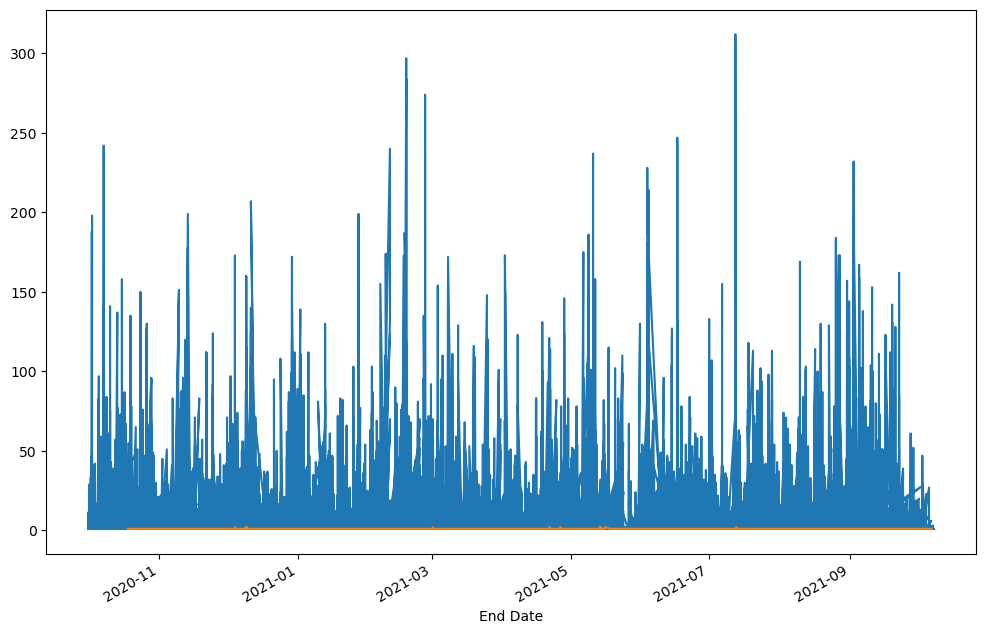

In [228]:
plt.figure(figsize = (12,8))
jobs_completed['END'].value_counts(sort=False).plot(kind='line', xlabel='End Date')
ce_merged['timestamp'].value_counts(sort=False).plot(kind='line', xlabel='End Date')

In [232]:
#df['start_time2'] = df['start_time'].apply(lambda x: x.replace(minute=0, second=0))
ce_merged['timestamp_rounded'] = ce_merged['timestamp'].apply(lambda x: x.replace(minute=0, second=0))
ce_merged

,timestamp,user,code,responsetime,return_code,command,timestamp_rounded
0,2020-10-18 06:16:25,user 9204,retry 0,20.037672,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",2020-10-18 06:00:00
1,2020-10-18 06:38:44,user 9204,retry 0,20.038736,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",2020-10-18 06:00:00
2,2020-10-18 06:53:44,user 9204,retry 0,20.038464,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",2020-10-18 06:00:00
3,2020-10-18 06:54:04,user 9204,retry 1,20.048906,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",2020-10-18 06:00:00
4,2020-10-18 07:47:25,user 9204,retry 0,20.082628,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",2020-10-18 07:00:00
...,...,...,...,...,...,...,...
3291,2021-09-24 18:14:35,user 9204,retry 0,20.041436,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",2021-09-24 18:00:00
3292,2021-09-24 19:13:14,user 9204,retry 0,20.051321,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",2021-09-24 19:00:00
3293,2021-10-02 08:14:16,user 9204,retry 0,19.083227,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",2021-10-02 08:00:00
3294,2021-10-02 18:29:08,user 9204,retry 0,20.043146,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",2021-10-02 18:00:00


In [352]:
ce_merged['timestamp_rounded'] = ce_merged['timestamp'].apply(lambda x: x.round(freq='10min'))
ce_merged

,timestamp,user,code,responsetime,return_code,command,timestamp_rounded
0,2020-10-16 11:43:45,user 9201,retry 0,20.150959,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",2020-10-16 11:40:00
1,2020-10-16 11:43:45,user 9201,retry 0,20.188296,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",2020-10-16 11:40:00
2,2020-10-16 11:43:45,user 9201,retry 0,20.218138,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",2020-10-16 11:40:00
3,2020-10-16 11:43:46,user 9201,retry 0,20.114305,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",2020-10-16 11:40:00
4,2020-10-16 11:43:46,user 9202,retry 0,20.092560,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",2020-10-16 11:40:00
...,...,...,...,...,...,...,...
107365,2021-10-02 18:08:41,user 9201,retry 0,21.986075,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",2021-10-02 18:10:00
107366,2021-10-02 18:18:44,user 9201,retry 0,20.067277,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",2021-10-02 18:20:00
107367,2021-10-02 18:18:44,user 9201,retry 0,20.071901,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",2021-10-02 18:20:00
107368,2021-10-02 18:29:08,user 9204,retry 0,20.043146,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",2021-10-02 18:30:00


In [ ]:
jobs_completed['END_rounded'] = jobs_completed['END'].apply(lambda x: x.replace(minute=0, second=0))
jobs_completed

In [304]:
jobs_completed['END_rounded'] = jobs_completed['END'].apply(lambda x: x.round(freq='10min'))
jobs_completed

C:\Users\Maria\AppData\Local\Temp\ipykernel_32044\2799305659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobs_completed['END_rounded'] = jobs_completed['END'].apply(lambda x: x.round(freq='10min'))


,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,TIMEDIFF,END_rounded
1,30853133,COMPLETED,2021-08-06T11:36:09,2021-09-05 11:36:32,262144Mn,20604.62M,30 days 00:00:00,30 days 00:00:23,1,1,cgw-platypus,0:0,-23.0,2021-09-05 11:40:00
2,30858137,COMPLETED,2021-08-06T19:04:39,2021-09-05 19:04:53,204800Mn,57553.77M,30 days 00:00:00,30 days 00:00:14,1,32,cgw-tbi01,0:0,-14.0,2021-09-05 19:00:00
3,30935078,COMPLETED,2021-08-09T16:52:51,2021-09-07 20:52:55,65536Mn,20577.96M,29 days 04:00:00,29 days 04:00:04,1,8,cgw-platypus,0:0,-4.0,2021-09-07 20:50:00
4,31364111_2,COMPLETED,2021-08-17T07:45:07,2021-09-10 16:45:24,16384Mn,9733.43M,24 days 09:00:00,24 days 09:00:17,1,1,production,0:0,-17.0,2021-09-10 16:50:00
5,31364111_3,COMPLETED,2021-08-17T07:45:07,2021-09-06 16:17:34,16384Mn,9708.04M,24 days 09:00:00,20 days 08:32:27,1,1,production,0:0,347253.0,2021-09-06 16:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7395880,25493434,COMPLETED,2020-10-31T23:39:00,2020-10-31 23:40:46,2000Mn,0.09M,2 days 00:00:00,0 days 00:01:46,1,1,sam,0:0,172694.0,2020-10-31 23:40:00
7395881,25493435,COMPLETED,2020-10-31T23:39:13,2020-10-31 23:40:38,2000Mn,187.92M,2 days 00:00:00,0 days 00:01:25,1,1,sam,0:0,172715.0,2020-10-31 23:40:00
7395882,25493476,COMPLETED,2020-10-31T23:46:29,2020-10-31 23:49:43,4096Mc,803.97M,0 days 12:00:00,0 days 00:03:14,1,1,production,0:0,43006.0,2020-10-31 23:50:00
7395883,25493515,COMPLETED,2020-10-31T23:49:44,2020-10-31 23:51:40,2000Mn,0.09M,2 days 00:00:00,0 days 00:01:56,1,1,sam,0:0,172684.0,2020-10-31 23:50:00


In [312]:
jobs_completed['END_rounded'].value_counts()

END_rounded
2021-06-03 17:30:00    4385
2020-12-11 08:20:00    3092
2020-12-11 08:40:00    2959
2021-06-01 11:20:00    2907
2020-12-11 08:50:00    2833
                       ... 
2021-10-04 06:10:00       1
2021-09-17 12:20:00       1
2021-09-17 12:10:00       1
2021-10-05 10:10:00       1
2021-09-17 02:40:00       1
Name: count, Length: 53307, dtype: int64

In [360]:
#pd.DataFrame({'email':sf.index, 'list':sf.values})
jobs_totals = pd.DataFrame(jobs_completed['END_rounded'].value_counts(sort=False).reset_index())
jobs_totals

,END_rounded,count
0,2021-09-05 11:40:00,375
1,2021-09-05 19:00:00,68
2,2021-09-07 20:50:00,94
3,2021-09-10 16:50:00,88
4,2021-09-06 16:20:00,150
...,...,...
53302,2020-10-31 18:30:00,18
53303,2020-10-31 22:20:00,109
53304,2020-10-31 18:50:00,24
53305,2020-10-31 20:50:00,23


In [362]:
#rename column: df.rename(columns={"oldname": "newname"})
jobs_totals = jobs_totals.rename(columns={"END_rounded":"timestamp", "count":"jobs_completed"})
jobs_totals

,timestamp,jobs_completed
0,2021-09-05 11:40:00,375
1,2021-09-05 19:00:00,68
2,2021-09-07 20:50:00,94
3,2021-09-10 16:50:00,88
4,2021-09-06 16:20:00,150
...,...,...
53302,2020-10-31 18:30:00,18
53303,2020-10-31 22:20:00,109
53304,2020-10-31 18:50:00,24
53305,2020-10-31 20:50:00,23


In [364]:
errors_totals = pd.DataFrame(ce_merged['timestamp_rounded'].value_counts(sort=False).reset_index())
errors_totals

,timestamp_rounded,count
0,2020-10-16 11:40:00,7
1,2020-10-16 17:40:00,15
2,2020-10-16 22:20:00,10
3,2020-10-16 22:30:00,51
4,2020-10-16 22:40:00,187
...,...,...
6357,2021-10-02 17:50:00,1
6358,2021-10-02 18:10:00,1
6359,2021-10-02 18:20:00,2
6360,2021-10-02 18:30:00,1


In [366]:
errors_totals = errors_totals.rename(columns={"timestamp_rounded":"timestamp", "count":"errors"})
errors_totals

,timestamp,errors
0,2020-10-16 11:40:00,7
1,2020-10-16 17:40:00,15
2,2020-10-16 22:20:00,10
3,2020-10-16 22:30:00,51
4,2020-10-16 22:40:00,187
...,...,...
6357,2021-10-02 17:50:00,1
6358,2021-10-02 18:10:00,1
6359,2021-10-02 18:20:00,2
6360,2021-10-02 18:30:00,1


In [472]:
totals_df = pd.merge(jobs_totals, errors_totals, on='timestamp', how='outer')
totals_df

,timestamp,jobs_completed,errors
0,2020-10-01 00:10:00,3.0,NaN
1,2020-10-01 00:20:00,12.0,NaN
2,2020-10-01 00:30:00,29.0,NaN
3,2020-10-01 00:40:00,122.0,NaN
4,2020-10-01 00:50:00,168.0,NaN
...,...,...,...
53318,2021-10-07 20:00:00,2.0,NaN
53319,2021-10-07 20:10:00,1.0,NaN
53320,2021-10-07 20:20:00,1.0,NaN
53321,2021-10-07 20:30:00,2.0,NaN


In [474]:
totals_df = totals_df.fillna(value=0)

In [420]:
totals_df

,timestamp,jobs_completed,errors
0,2020-10-01 00:10:00,3.0,0.0
1,2020-10-01 00:20:00,12.0,0.0
2,2020-10-01 00:30:00,29.0,0.0
3,2020-10-01 00:40:00,122.0,0.0
4,2020-10-01 00:50:00,168.0,0.0
...,...,...,...
53318,2021-10-07 20:00:00,2.0,0.0
53319,2021-10-07 20:10:00,1.0,0.0
53320,2021-10-07 20:20:00,1.0,0.0
53321,2021-10-07 20:30:00,2.0,0.0


In [476]:
totals_df = totals_df.sort_values(by='timestamp')
totals_df

,timestamp,jobs_completed,errors
0,2020-10-01 00:10:00,3.0,0.0
1,2020-10-01 00:20:00,12.0,0.0
2,2020-10-01 00:30:00,29.0,0.0
3,2020-10-01 00:40:00,122.0,0.0
4,2020-10-01 00:50:00,168.0,0.0
...,...,...,...
53318,2021-10-07 20:00:00,2.0,0.0
53319,2021-10-07 20:10:00,1.0,0.0
53320,2021-10-07 20:20:00,1.0,0.0
53321,2021-10-07 20:30:00,2.0,0.0


In [484]:
totals_df2 = totals_df.set_index('timestamp')
totals_df2

,jobs_completed,errors
timestamp,,
2020-10-01 00:10:00,3.0,0.0
2020-10-01 00:20:00,12.0,0.0
2020-10-01 00:30:00,29.0,0.0
2020-10-01 00:40:00,122.0,0.0
2020-10-01 00:50:00,168.0,0.0
...,...,...
2021-10-07 20:00:00,2.0,0.0
2021-10-07 20:10:00,1.0,0.0
2021-10-07 20:20:00,1.0,0.0


<Axes: xlabel='timestamp'>

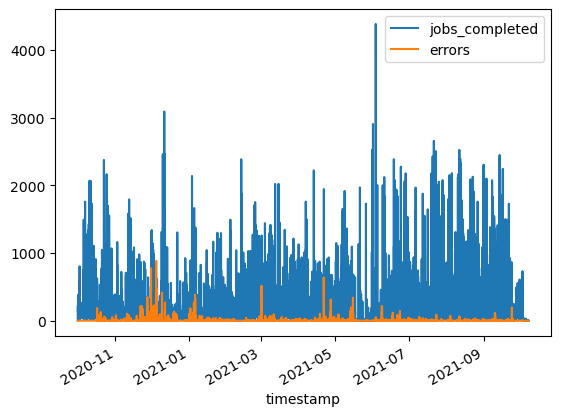

In [426]:
totals_df.plot()

Text(0, 0.5, 'Count')

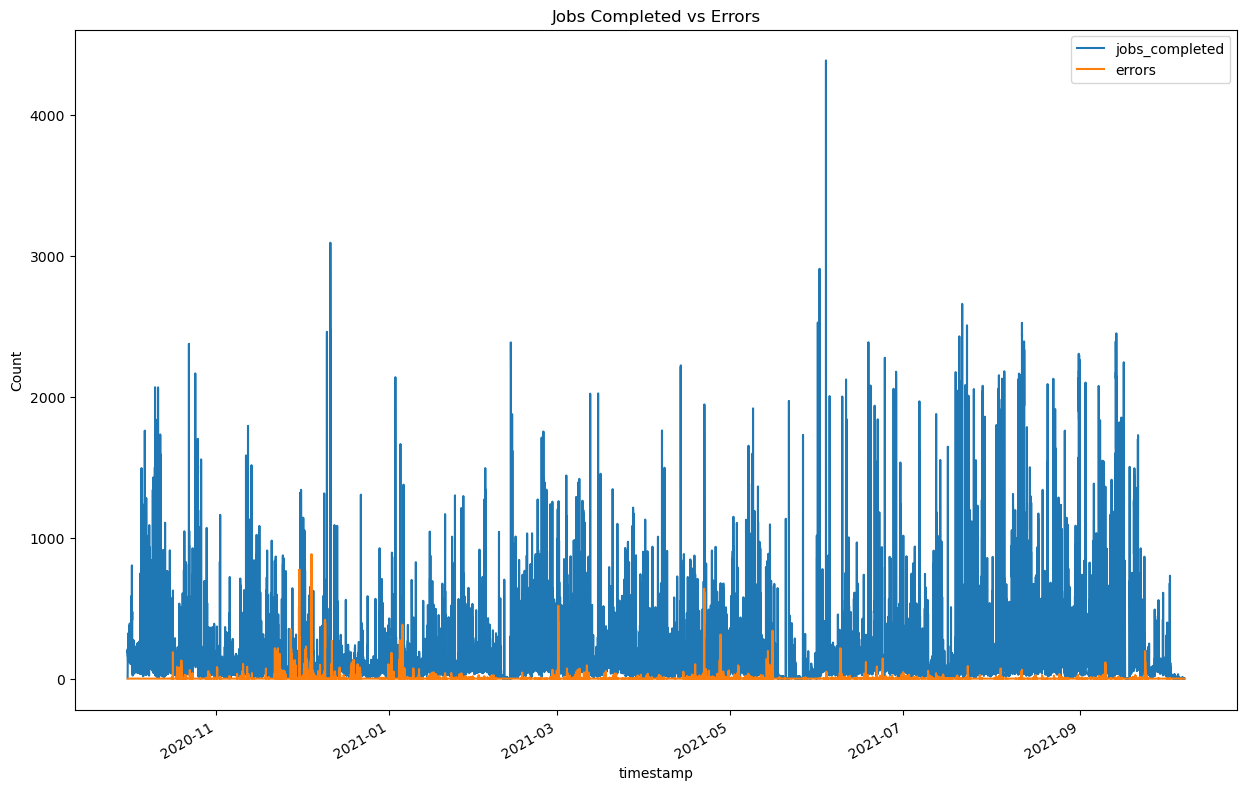

In [486]:
fig, ax = plt.subplots(figsize=(15, 10))
totals_df2.plot(kind='line', ax=ax)
plt.title('Jobs Completed vs Errors')
plt.ylabel('Count')

In [492]:
totals_df_202011 = totals_df[(totals_df['timestamp'] > '2020-11-01 00:00:00') & (totals_df['timestamp'] < '2021-02-01 00:00:00')].set_index('timestamp')
totals_df_202011

,jobs_completed,errors
timestamp,,
2020-11-01 00:10:00,56.0,0.0
2020-11-01 00:20:00,45.0,0.0
2020-11-01 00:30:00,53.0,0.0
2020-11-01 00:40:00,41.0,0.0
2020-11-01 00:50:00,49.0,0.0
...,...,...
2021-01-31 23:10:00,59.0,0.0
2021-01-31 23:20:00,39.0,0.0
2021-01-31 23:30:00,59.0,0.0


Text(0, 0.5, 'Count')

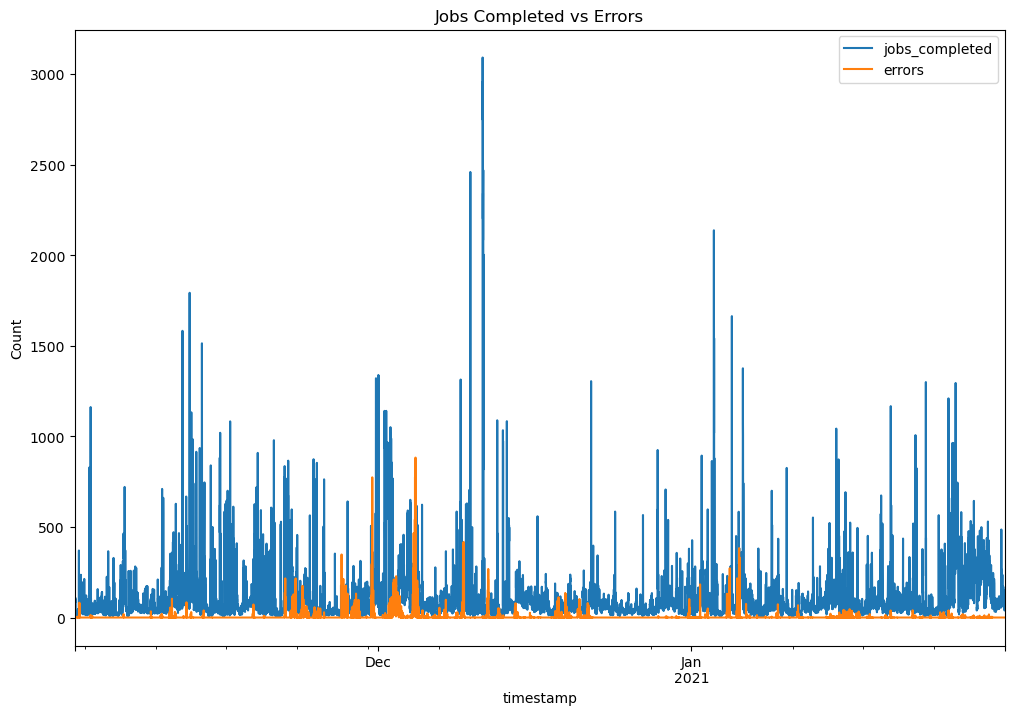

In [494]:
fig, ax = plt.subplots(figsize=(12, 8))
totals_df_202011.plot(kind='line', ax=ax)
plt.title('Jobs Completed vs Errors')
plt.ylabel('Count')

In [ ]:
totals_df['errors']